In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [50]:
traindf = pd.read_csv('mnist_train.csv')
testdf = pd.read_csv('mnist_test.csv')

In [51]:
traindf.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
traindf.label.unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8])

In [53]:
# define x train and y train

xtrain = traindf.iloc[:, 1:].to_numpy()
ytrain = traindf.iloc[:, 0].to_numpy()


# reshape and normalize xtrain  => (28x28 pixels and 1 is for black and white)
xtrain = xtrain.reshape([-1, 28, 28, 1])
xtrain = xtrain / 255    # so that it is between 0 to 1 (normalization)


In [54]:
# define xtest and reshape and normalize this as well


xtest = testdf.iloc[:, 1:].to_numpy()

xtest = xtest.reshape([-1, 28,28, 1])
xtest = xtest / 255


ytest = testdf.iloc[:, 0].to_numpy()


In [61]:
# MODEL


import tensorflow as tf
models = tf.keras.models
layers = tf.keras.layers


model = models.Sequential()

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())

model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 10816)             0         
                                                                 
 dense_16 (Dense)            (None, 32)                346144    
                                                                 
 dense_17 (Dense)            (None, 10)                330       
                                                                 
Total params: 347114 (1.32 MB)
Trainable params: 347114 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [62]:
model.fit(xtrain, ytrain, epochs=3, validation_split=0.05)

Epoch 1/3
1782/1782 [==============================] - 8s 5ms/step - loss: 0.1898 - accuracy: 0.9445 - val_loss: 0.0638 - val_accuracy: 0.9833
Epoch 2/3
1782/1782 [==============================] - 8s 5ms/step - loss: 0.0700 - accuracy: 0.9786 - val_loss: 0.0610 - val_accuracy: 0.9863
Epoch 3/3
1782/1782 [==============================] - 8s 5ms/step - loss: 0.0507 - accuracy: 0.9846 - val_loss: 0.0516 - val_accuracy: 0.9880


In [44]:
ypred1 = model.predict(xtest)
ypred = ypred1.argmax(axis = -1)
ypred

313/313 [==============================] - 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6])

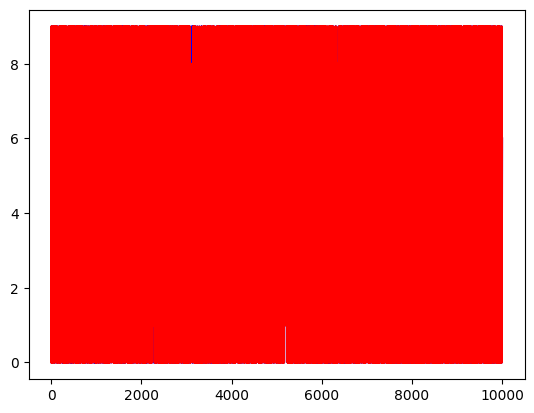

In [46]:
plt.plot(ypred, color='blue')
plt.plot(ytest, color='red')